# Understand Time Series through Decomposition

## Problem Definition

$ y = S + T + E $

Decompose into:
- T: Trend/Cycle
- S: Seasonal
- E: Error


## How to extract Trend?
- Moving Average
    * For example: 7 \* MA for weekly data
    
    
- Moving Average of Moving Average 
    * For example: 2 \* 12 MA for monthly data, 2 * 4 MA for quarterly data
    * In R: `ma(elecequip, order=12, centre = TRUE)` 2 \* 12 MA 
    
    
- Weighted Moving Average
    * 2 * 4 MA is a special case. i.e., W = [1/8, 1/4, 1/4, 1/4, 1/8] 

## Decomposition
1. Calculate De-trended data by using MA or 2 - m MA or m MA: **T**
1. Simple average of, for example, all January data. Adjust 12 values to sum up to zero. **S**
1. The remainder is error **E**

Issues: 
- No observation for beginning/ending
- Constant seasonal components over years
- Not robust to outliers

Other Methods:
- X-12-ARIMA Decomposition 
- **STL Decomposition**
    * Handle any type of seasonality
    * Change of seasonality over time
    * Users have control over smoothness
    * Robust to outliers
    
Forecast with decompositions:
- Naive forecast for seasonal component (assume no change, take from last year)
- For T and E
    * Random walk with drift model
    * Holt's method
    * non-seasonal ARIMA with differencing

# Time series forecasting - Exponential Smoothing

<img src="https://www.otexts.org/sites/default/files/fpp/images/Table7-8.png" width="800">





Take a deeper look at one example: **Holt-Winters Additive method**
- Main idea
    * Base
    * Error
- Key:
    - Y := L + 1 * b + S
    - L := L + b
    - S := S
    - b := b
    
    - L1 = (Y - S) 
    - L2 = L + b
    
    - S1 = Y - l - b
    - S2 = S
    
    - b1: L - L
    - b2: b

- Forecast = level + trend + seasonal component <br/>
$ \hat{y}_{t+h|t} = l_t + hb_t + s_{last} $


- Level = Seasonal Adjusted Observation + Non-seasonal Forecast for t <br/>
$l_t = \alpha(y_t - s_{t-m}) + (1 - \alpha)(l_{t-1} + b_ {t-1})$


- Trend = Change in level + Trend from last year <br/>
$ b_t = \beta(l_t - l_{t-1}) + (1-\beta)b_{t-1}$


- Seasonal = Current seasonal index + Seasonal index from last year <br/>
$ s_t = \gamma(y_t - l_{t-1} - b_{t-1} )+ (1-\gamma)(s_{t-m}) $


- Unified error correction form:<br/>
$ \theta := \theta + \alpha * error $<br/>
$ error = y_t - (l_{t-1} + b_{t-1} + s_{t-m}) $

**Variations**
1. Damped Trend Model:
    - Short-run: trended
    - Long-run: constant
    - $ \hat{y}_{t+h|t} = ... + (\phi + \phi + ... + \phi^h)b_t + ... $
1. Exponential Trend Model
    - $ \hat{y}_{t+h|t} = l_tb^h_t $
1. Holt's linear Trend model
    - No seasonal term




# ARIMA Models

## Define a stationary series
**Definition of weak stationarity**

- $ E(Y_t) = 0 $ <br/>
- $ Var(Y_t) = constant $
- $ Cov(Y_t, Y_{t-k}) = \gamma_k $
- Think of The covariance matrix


**Dickey Fuller Test of Stationarity (for AR1)**

- $ Y_t = \phi Y_{t-1} + \epsilon_t$
- $Y_t - Y_{t-1} = (\rho - 1) Y_{t-1} + \epsilon_t$
- Intuition: higher value will be followed with a decrease, and lower value will be followed with an increase; 
- Random walk with $\phi$ = 1 is not stationary since the last position do not imply increase or decrease
- Test if $(\rho-1)$ is zero or not, i.e., if $\rho$ is equal to one; If zero, then non-stationary

**Augmented Dickey Fuller (ADF) Test of Stationarity (for ARMA)**

- $Y_t = \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \phi_3 Y_{t-3} +... +\epsilon_t $
- $Y_t - Y_{t-1} = \rho Y_{t-1}  - \alpha_1 (Y_{t-1} - Y_{t-2}) - \alpha_2 (Y_{t-2} - Y_{t-3}) - ... + \epsilon_t $
- Intuition: for a non-stationary series, $Y_{t-1}$ will not provide relevant information in predicting the change in $Y_t$ besides the lagged changes $\Delta$
- In other words: measure if the contribution of lagged value $Y_{t-1}$ is significant or not
- How to lag length `k`? Use AIC, BIC for model selection, or default $(T-1)^{1/3}$

**Variations**
- Other options: KPSS test, hypothesis opsite

## AR(1) and MA(1) Model
### AR(1) Model
$ Y_t = c + \phi Y_{t-1} + \epsilon_t,\ where\ \epsilon\ - iid(0, \sigma^2) $

$ Assume\ |\phi| < 1 $ This is the stationary condition, It can be shown that the series $ Y_t $ is stationary if $|\phi|$ < 1

- if $ \phi = 1 $ and $ c = 0 $ : random walk
- if $ \phi = 1 $ and $ c <> 0 $ : random walk **with drift**

### MA(1) Model
$ Y_t = c + \epsilon_t + \theta\epsilon_{t-1}$<br/>
Compare with AR (1): noise / shock quickly vanishes with time.

Note: Difference between MA model and MA *smoothing*
- MA model: forecast stationary series
- MA *smoothing*: forecast trend

### I(d) - Degree of differencing
- I(2) means the series need to be differenced TWICE in order to be stationary
- For example: random walk: $ Y_t = Y_{t-1} + \epsilon_t $ is **I(1)**

### Constant Term
- Example - ARIMA (0, 1, 1)
    * $ y_t = Y_t - Y_{t-1} = \mu + \phi \epsilon_{t-1} + \epsilon_t$, where it is a combination of *deterministic trend* and *stochastic trend*.
    * $ \mu$ is the constant term. $E(Y_t) = \mu t$. If $\mu$ = 0, $ Y_t - Y_{t-1} =  \phi \epsilon_{t-1} + \epsilon_t$.
    * $ Y_t = \epsilon_t + Y_{t-1} - \theta\epsilon_{t-1} = \epsilon_t + Y_{t-1} - \theta(Y_{t-1} - Y_{t-2} + \theta_1\epsilon_{t-2}) + ...... = \epsilon_t + (1-\theta_1) Y_{t-1}  + \theta_1(1-\theta_1)Y_{t-2} + ......$
    * Same as Simple Exponential Smooth (SES)

## ARIMA

### Transformation to stationary
- Log/Square root/ Differencing/Box-cox transformation
- Log: fix exponentially trending
- Detrend: Y = (mean + trend * t) + error; Model trend from here 
- Differencing: 
    * First-order differencing: $Y_t - Y_{t-1} = ARMA(p,q)$ 
    * Seasonal differencing with period m: $Y_t - Y_{t-m} = ARMA(p,q)$
    * Here the order of differencing is `I` in AR(I)MA

### Non-seasonal and Seasonal

- Base: $ y_t = \mu + \phi_1 y_{t-1} + ... + \phi_p y _{t-p} + \theta_1 e_{t-1} + ... + \theta_q e_{t-q} + e_t $

- Seasonal Differencing

    * Example: **ARIMA(1,1,1)(1,1,1)4 without constant**
<img src="https://www.otexts.org/sites/default/files/fpp/images/sarima2.png" width="700">


### Identify `p` and `q`

**Two useful graphs**
- Auto Correlation Function (ACF):
    * A lag k aurocorrelation: $Corr(Y_t, Y_{t-k})$
    * AR(1): Gradually decrease with lag k
    * MA(1): Spike at lag 1, then zero for lag k > 1
    
    
- Partial Correlation Function (PACF):
    * Only measure the association between $Y_t, Y_{t-k}$
    * Exclude the effect of $Y_{t-1}, ..., Y_{t-(k-1)} $
    

### Model estimation
- Use repeated KPSS tests to determine differenced d to achieve stationary series
- Use *Maximum Likelihood Estimation* to minimize $ e^2_t $
- The value of `p` and `q` are selected by minimizing AIC_c using some search strategy
- Start from base ARIMA and add variations until no lower AIC_c found

### Model selection

- Use AIC and BIC
- Example: AIC_c = -2log(L) + 2 (p + q + k + 1) + correction_term


### Examine residuals
- Should be white noise iid

### Forecasting
https://www.otexts.org/fpp/8/8


**- Probably ARIMA(0,0,3) Example**

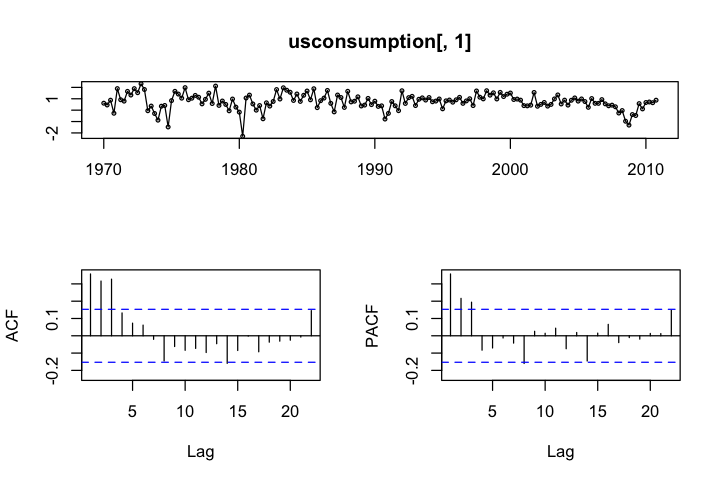

In [154]:
tsdisplay(usconsumption[,1])

In [155]:
auto.arima(usconsumption[,1], seasonal = FALSE)

Series: usconsumption[, 1] 
ARIMA(0,0,3) with non-zero mean 

Coefficients:
         ma1     ma2     ma3    mean
      0.2542  0.2260  0.2695  0.7562
s.e.  0.0767  0.0779  0.0692  0.0844

sigma^2 estimated as 0.3953:  log likelihood=-154.73
AIC=319.46   AICc=319.84   BIC=334.96

**- Probably ARIMA(0,1,1)(0,1,1)_4**

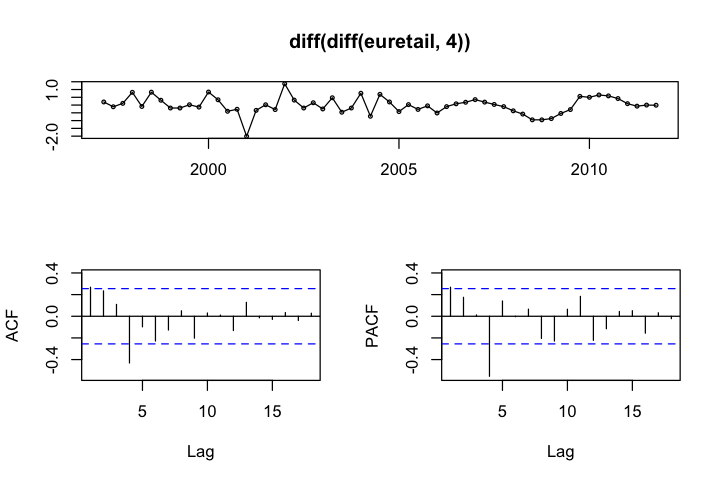

In [156]:
tsdisplay(diff(diff(euretail,4)))

In [157]:
auto.arima(euretail,stepwise=FALSE, approximation=FALSE)

Series: euretail 
ARIMA(0,1,3)(0,1,1)[4] 

Coefficients:
         ma1     ma2     ma3     sma1
      0.2625  0.3697  0.4194  -0.6615
s.e.  0.1239  0.1260  0.1296   0.1555

sigma^2 estimated as 0.1564:  log likelihood=-28.7
AIC=67.4   AICc=68.53   BIC=77.78

## Dynamic Regression: Auto-regression for error term


- Formulation
    * $y_t = X_t * \beta + \epsilon_t,\ where\ errors\ (\epsilon_t)\ is\ autocorrelated$ <br> 
        * What happens: solution not efficient any more, and statistical tests no longer apply
    * $ Assume\ \epsilon_t = \rho \epsilon_{t-1} + \omega_t\ where\ \omega\ - iid(0, \sigma^2) $ <br/>
    * Note: More appropriate ARMA model can be available
    * Similary, it can be shown/proved that the series $ \epsilon_t $ is stationary
    
    
- Rewrite assumtpion for stationary
    * $ E(\epsilon ) = 0 $ <br/>
    * $ E(\epsilon^2 | X ) = \rho(\frac{\sigma^2}{1-\rho^2}) $ Homescedasticity <br/>
    * $ E(\epsilon_i \epsilon_j) = \rho_{|i-j|} * \sigma^2 $ What matters is proximity $k = |i-j|$
        * $ Corr(\epsilon_t, \epsilon_{t-1}) = \rho $
    
- Model assumptions
    * Stationarity for Y and X
    * Differencing may be needed

- How to solve for $\beta$?
    * One way: **Cochrane-Orcutt Method**
    * OLS: $\hat{\epsilon_t} = y_t - \hat{\alpha} - \hat{\beta} * x_t$
    * OLS: $\hat{\epsilon_t} = \rho \hat{\epsilon_{t-1}} + \omega_t,\ solve\ for\ \hat{\rho}$
    * Re-formulate: $y_t^* = \alpha(1-\hat{\rho}) + \beta* x_t^* + \omega_t,\ solve\ for\ \hat{\alpha}, \hat{\beta} $
    * Re-iterate until convergence
    
    
    
- How to predict?
    * $F_{t+1} = \hat{y}_{t+1} + re_t$, combining regression part and ARMA part
    * how about X? model separately, given, or assume future values

## Test for auto-correlation
**Durbin-Watson test**
- $\epsilon_t = \rho \epsilon_{t-1} + \omega_t\ $
- Hypothesis
    * $H_0: \rho = 0$<br/>
    * $H_1: \rho <> 0$

- Test statistics

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS7ldvxO8eWwkHL64DbkWEPQFkp8oMrRWEZDqjAcnLafBgJhjf6" width="200">

**Ljung-Box Q Test**
- Hypothesis
    * $H_0$: the autocorrelations up to lag k are all zero
    * $H_1$: At least one is not zero

- Test statistics

<img src="http://file.scirp.org/Html/2-1630023/1a6d69eb-051a-4f24-978c-ff1fd0cb5071.jpg" width="200">


# An R Example

In [158]:
library("fpp")
data(elecequip)
options(repr.plot.width=4, repr.plot.height=3)

### STL decomposition

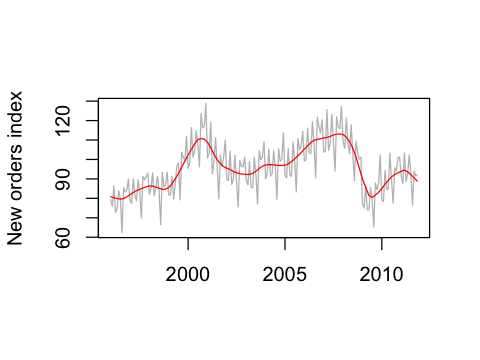

In [159]:
### STL function
fit <- stl(elecequip,t.window=15, s.window="periodic", robust=TRUE)
plot(elecequip, col="gray", ylab="New orders index", xlab="")
lines(fit$time.series[,2],col="red",ylab="Trend")

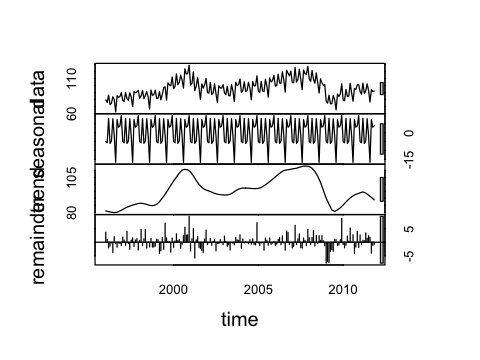

In [160]:
# S + T + E: subcomponents plot
plot(fit)

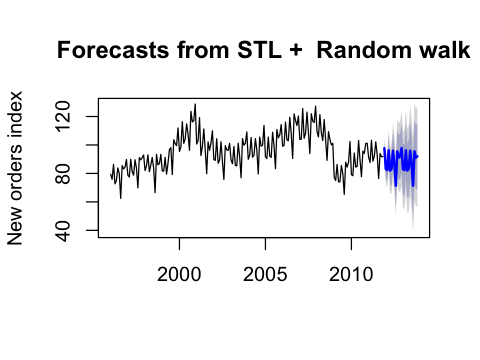

In [161]:
fcast <- forecast(fit, method="naive")
plot(fcast, ylab="New orders index")

### Holter-Winters

In [162]:
aust <- window(elecequip,start=1996)
fit1 <- hw(aust,seasonal="additive")
fit2 <- hw(aust,seasonal="multiplicative")

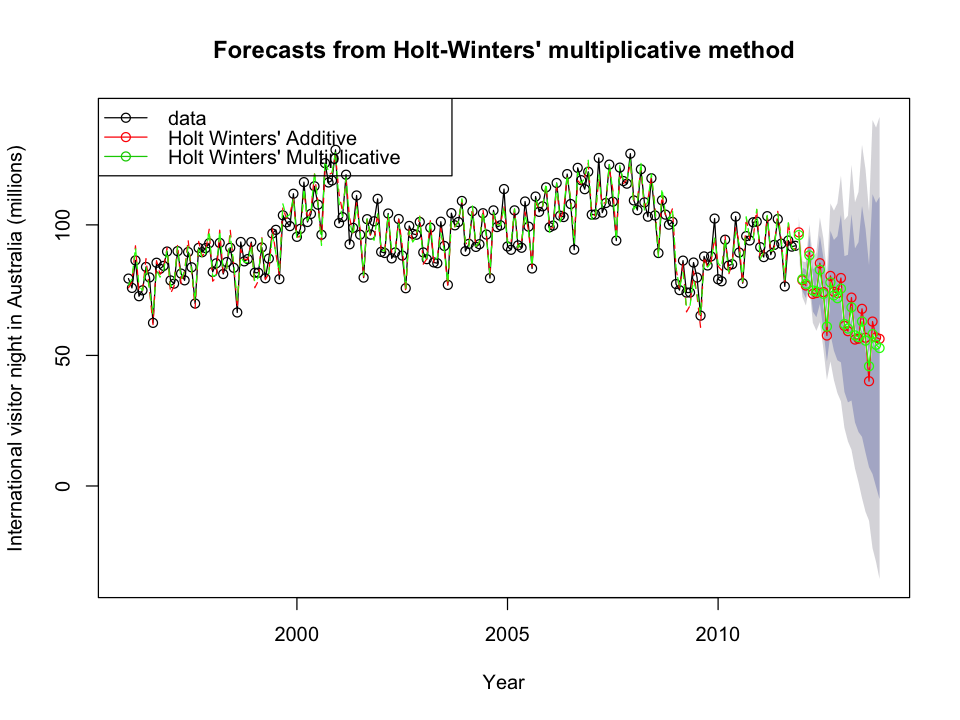

In [163]:
options(repr.plot.width=8, repr.plot.height=6)
plot(fit2,ylab="International visitor night in Australia (millions)",type="o", fcol="white", xlab="Year")
lines(fitted(fit1), col="red", lty=2)
lines(fitted(fit2), col="green", lty=2)
lines(fit1$mean, type="o", col="red")
lines(fit2$mean, type="o", col="green")
legend("topleft",lty=1, pch=1, col=1:3, c("data","Holt Winters' Additive","Holt Winters' Multiplicative"))

### Non-Seasonal ARIMA

- Use STL remove seasonal components
- No evidence of changing variance -> No need for log/BC transformation
- First differencing: Seems AR(3)
    * PACF drops after 3
    * ACF keeps decaying?
    * Imply **ARIMA(3,1,0)**

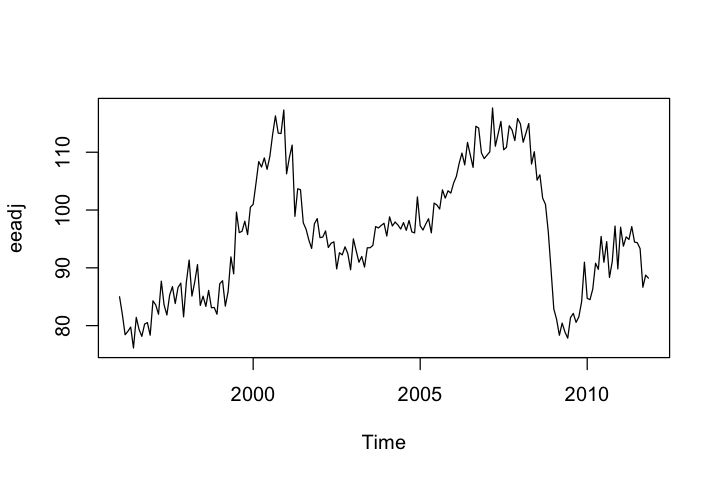

In [188]:
eeadj <- seasadj(stl(elecequip, s.window="periodic"))
plot(eeadj)

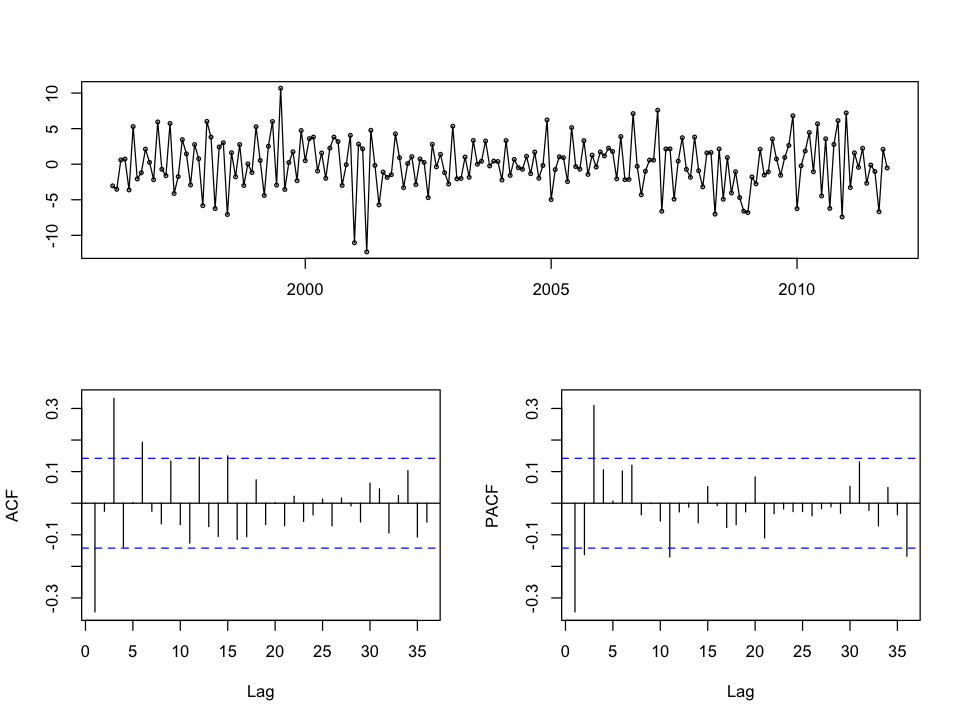

In [189]:
options(repr.plot.width=8, repr.plot.height=6)
tsdisplay(diff(eeadj),main="")

In [190]:
fit <- Arima(eeadj, order=c(3,1,1))
summary(fit)

Series: eeadj 
ARIMA(3,1,1) 

Coefficients:
         ar1     ar2     ar3      ma1
      0.0519  0.1191  0.3730  -0.4542
s.e.  0.1840  0.0888  0.0679   0.1993

sigma^2 estimated as 9.737:  log likelihood=-484.08
AIC=978.17   AICc=978.49   BIC=994.4

Training set error measures:
                       ME     RMSE      MAE         MPE     MAPE      MASE
Training set -0.001227744 3.079373 2.389267 -0.04290849 2.517748 0.2913919
                    ACF1
Training set 0.008928479


**Synthetic Example with a constant term**

Ussually omitted if I(d) > 1

https://robjhyndman.com/hyndsight/arimaconstants/

In [193]:
fit <- auto.arima(eeadj + 1:length(eeadj))
summary(fit)

Series: eeadj + 1:length(eeadj) 
ARIMA(3,1,1) with drift 

Coefficients:
         ar1     ar2     ar3      ma1   drift
      0.0527  0.1194  0.3731  -0.4550  0.9817
s.e.  0.1839  0.0888  0.0680   0.1991  0.2664

sigma^2 estimated as 9.79:  log likelihood=-484.08
AIC=980.16   AICc=980.62   BIC=999.64

Training set error measures:
                     ME    RMSE      MAE       MPE     MAPE      MASE
Training set 0.01407593 3.07933 2.388297 0.0176494 1.367877 0.1560084
                    ACF1
Training set 0.008943795



	Box-Ljung test

data:  residuals(fit)
X-squared = 20.496, df = 20, p-value = 0.4273


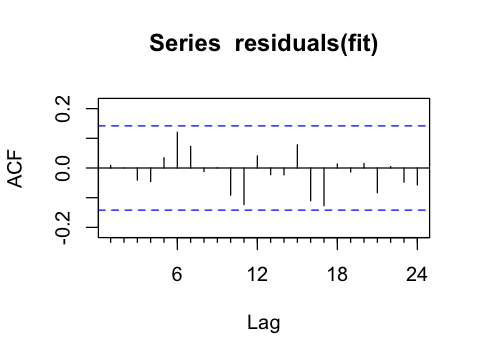

In [166]:
options(repr.plot.width=4, repr.plot.height=3)
Acf(residuals(fit))
Box.test(residuals(fit), lag=24, fitdf=4, type="Ljung") 
# Null: all autocorrelation is zero. Didn't reject null

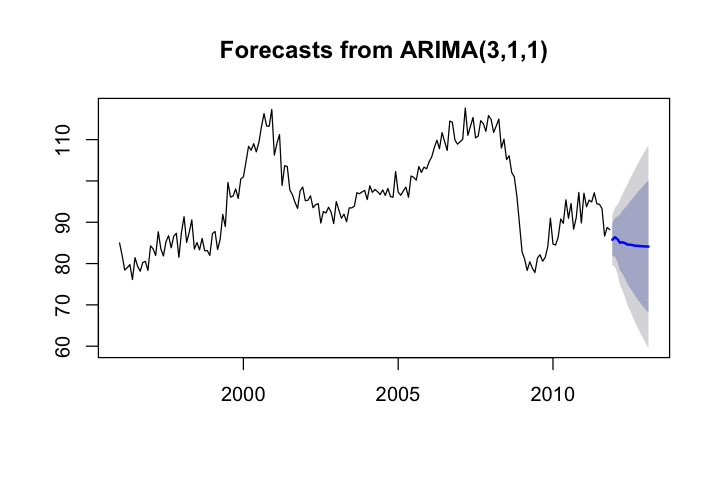

In [167]:
options(repr.plot.width=6, repr.plot.height=4)
plot(forecast(fit,h=15),include=1000)

### Seasonal ARIMA

In [187]:
fit <- auto.arima(elecequip )
fit

Series: elecequip + 1:191 
ARIMA(4,0,1)(0,1,1)[12] with drift 

Coefficients:
         ar1      ar2     ar3      ar4      ma1     sma1   drift
      1.1667  -0.0157  0.2049  -0.3824  -0.6099  -0.7986  1.0236
s.e.  0.1321   0.1348  0.1210   0.0718   0.1376   0.0740  0.0808

sigma^2 estimated as 11.15:  log likelihood=-473.69
AIC=963.38   AICc=964.23   BIC=988.88

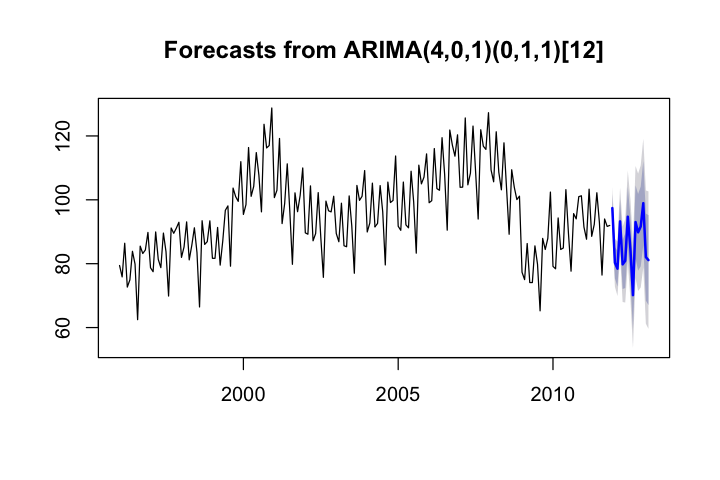

In [169]:
options(repr.plot.width=6, repr.plot.height=4)
plot(forecast(fit,h=15),include=1000)

# Reference

https://people.duke.edu/~rnau/411diff.htm

https://www.otexts.org/fpp